# Problem Statement:

Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [1]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading data
data = pd.read_excel("EastWestAirlines.xlsx", sheet_name = 'data')

# Data Exploration

In [3]:
data.shape

(3999, 12)

In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.tail()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0
3998,4021,3016,0,1,1,1,0,0,0,0,1398,0


In [6]:
data.sample(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3096,3118,175501,1000,3,1,1,34318,36,7974,19,2691,0
3616,3639,12078,0,1,1,1,500,1,500,1,983,0
3925,3948,8060,0,1,1,1,1750,4,0,0,1534,0
2639,2659,88563,0,4,1,1,42410,27,0,0,2567,0
3250,3273,8819,0,3,1,1,12472,15,0,0,1920,1


In [7]:
data.rename(columns={'Award?' : 'Award'},inplace=True)
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Quick Data Check

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


### Statistical summary

In [9]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


### Remove unnecessary columns

In [10]:
data = data.drop('ID#', axis=1)

### Identifying Missing Values

In [11]:
data.isna().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

- There is no missing values in dataset

# Data Visualization

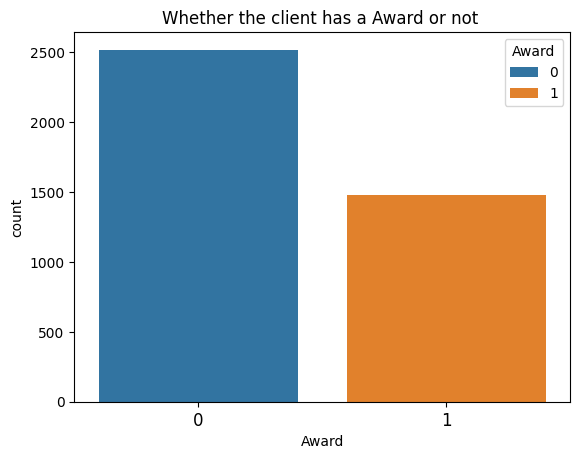

In [12]:
sns.countplot(x='Award', data=data, order=data['Award'].value_counts().index,hue='Award')
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not ');

- Approximately 2500 client not have any Award while 1500 clients with Awards

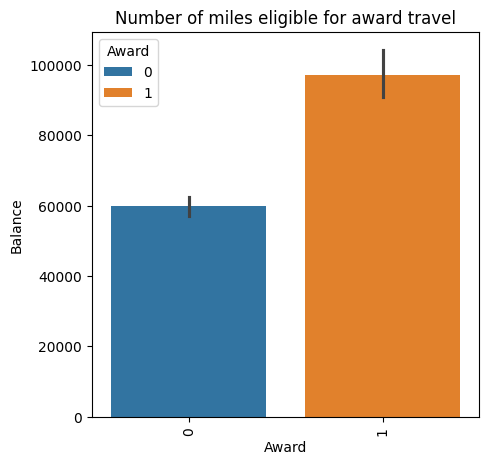

In [12]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance', ascending = False)
ax = sns.barplot(x='Award', y='Balance', data= Balance,hue='Award')
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.title('Number of miles eligible for award travel');

In [13]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403487
cc1_miles            0.338344
Bonus_trans          0.324935
Days_since_enroll    0.263129
Flight_trans_12      0.255700
Flight_miles_12mo    0.217551
Award                0.178494
Qual_miles           0.108722
cc3_miles            0.035243
cc2_miles           -0.008804
Name: Balance, dtype: float64

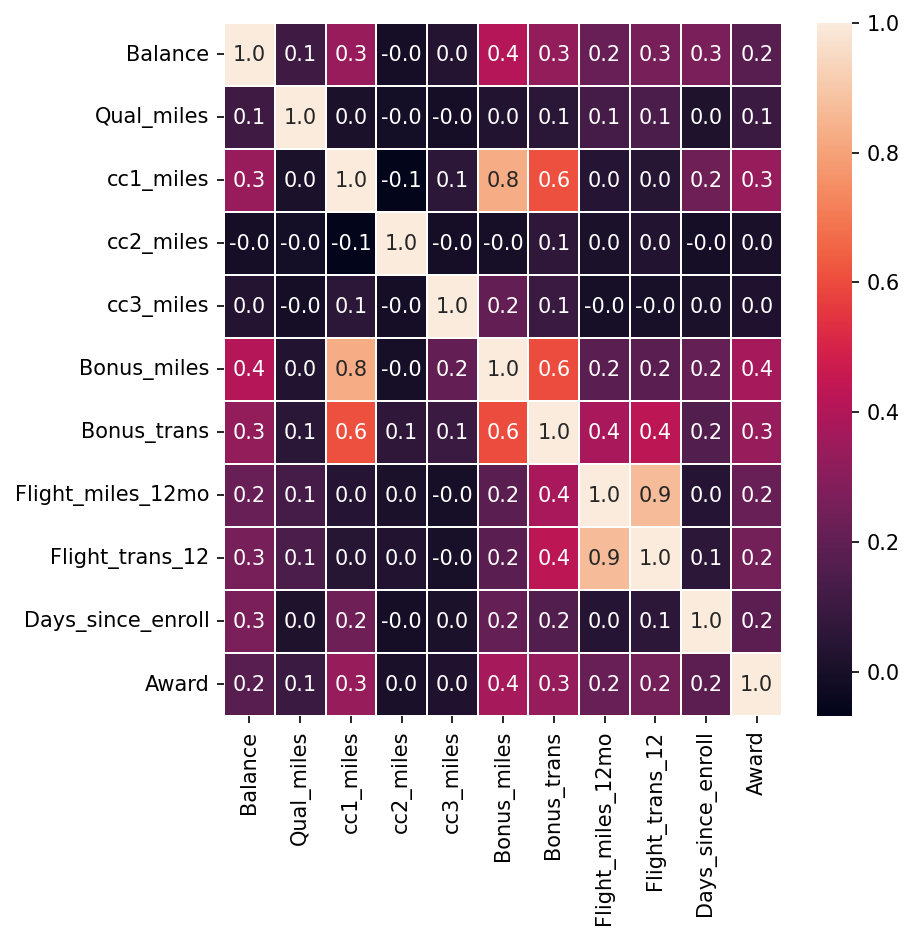

In [14]:
plt.figure(figsize=(6,6),dpi=150)
sns.heatmap(data.corr(),annot=True, linewidths =.2, fmt ='.1f');

Unique points in this correlation matrix:

- flight_trans_12 is positively correlated with flight_miles_12mo
- bonus_trans is positively correlated with cc1_miles
- bonus_trans is positively correlated with bonus_miles
- bonus_miles is positively correlated with cc1_miles
- In other words, the following are positively correlated

- Number of flight transactions in the past 12 months <-> Number of flight miles in the past 12 months
- Miles passengers earn with the freq. flyer credit card <-> Amount of non-flight transactions
- Number of non-flight bonus transactions <-> Miles passengers earn from non-flight bonus transactions
- Miles passengers earn from non-flight bonus transactions <-> Miles passengers earn with the freq. flyer credit card

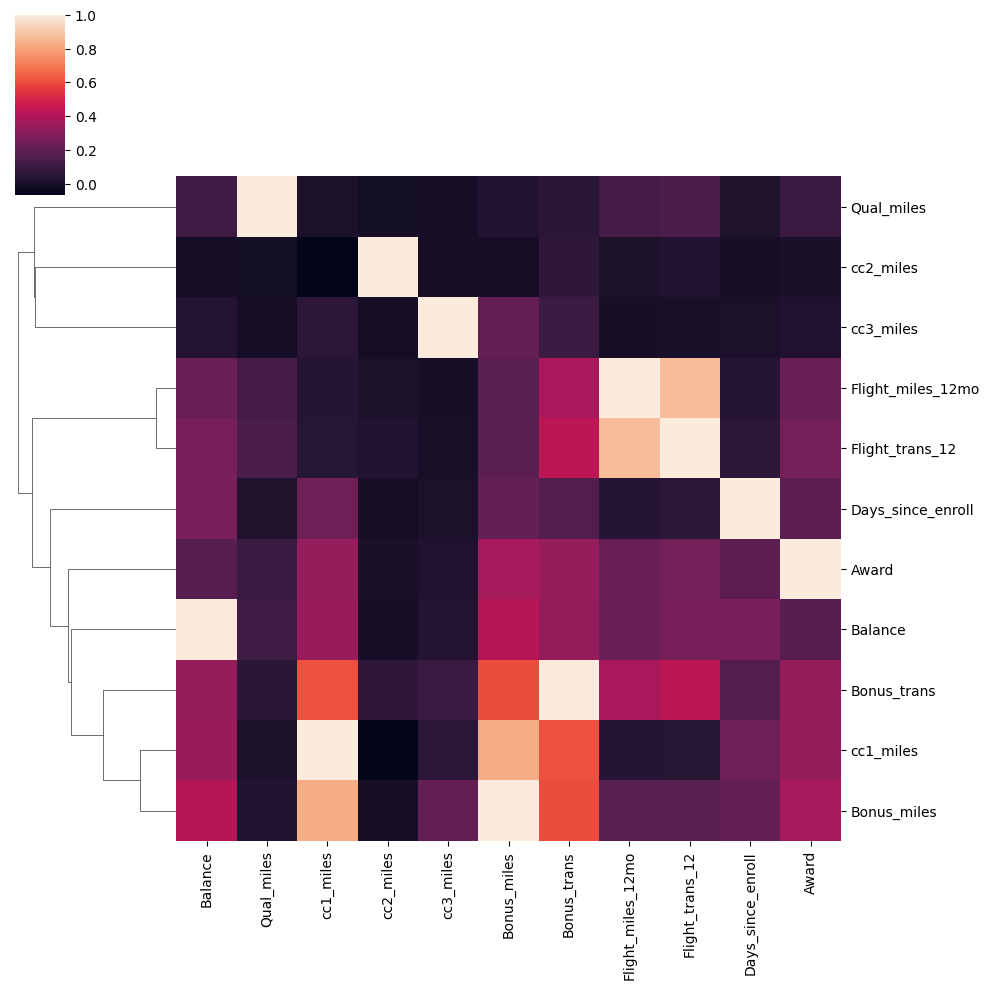

In [16]:
sns.clustermap(data.corr(),col_cluster=False)

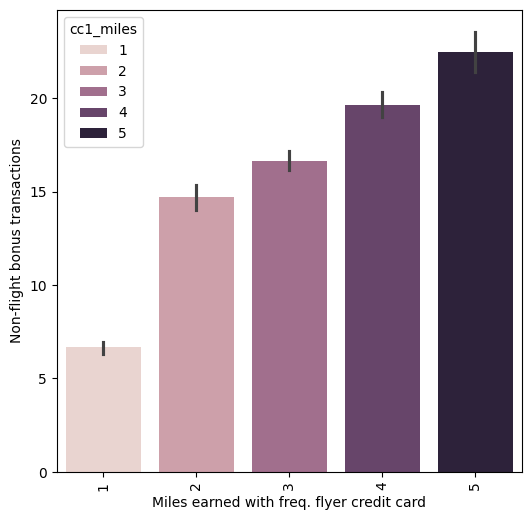

In [17]:
# Plotting frequent flying bonuses vs. non-flight bonus transactions 
plt.figure(figsize = (6,6),dpi=100)
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans', ascending = False)
ax = sns.barplot(x='cc1_miles', y='Bonus_trans', data= sorted_data,hue='cc1_miles')
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel= 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

- People who fly more frequently use bonus transactions more

# Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

scaled_data

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

# K-Means Clustering

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
ssd = []
silhouette_scores = []

for k in range(2,20):
    
    model = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = model.fit_predict(scaled_data)
   
    score = silhouette_score(scaled_data, kmeans_labels)
    
    ssd.append(model.inertia_)
    silhouette_scores.append(score)

C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

(2.0, 20.0)

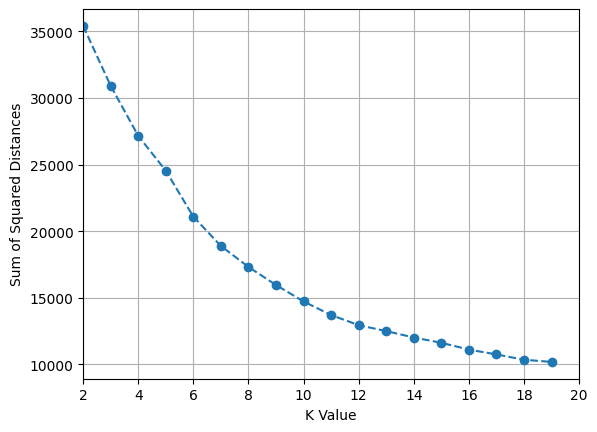

In [28]:
plt.plot(range(2,20),ssd,'o--')
plt.grid()
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')
plt.xlim(2,20)

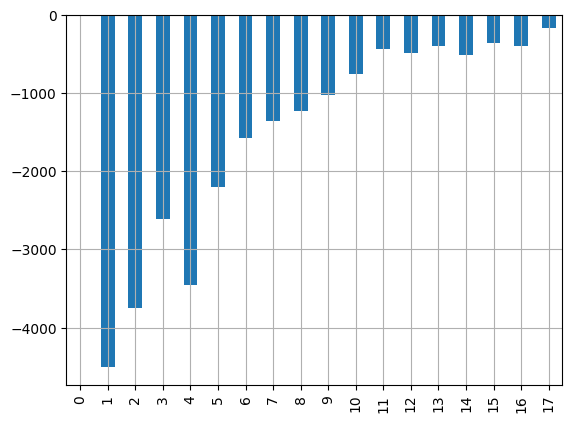

In [29]:
pd.Series(ssd).diff().plot(kind='bar')
plt.grid()

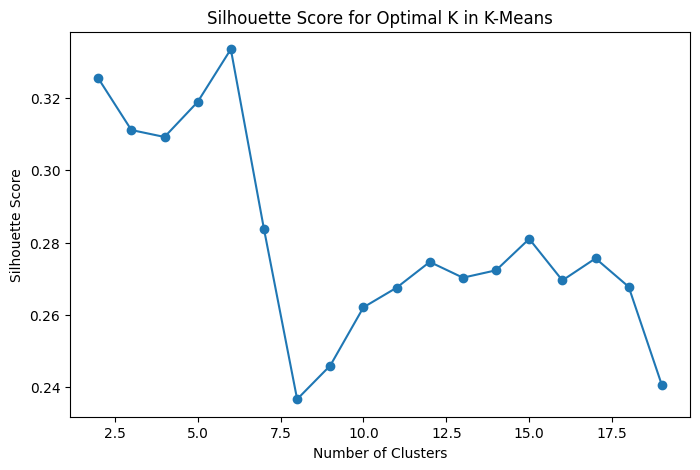

In [30]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K in K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [31]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

kmeans_labels = kmeans.fit_predict(scaled_data)

print("Optimal K value :",optimal_k)

Optimal K value : 6


C:\Users\vijay\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1])

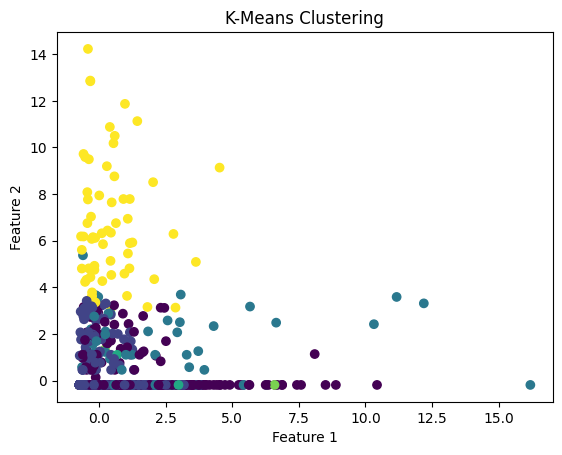

In [33]:
# Load the cluster labels
cluster_labels = kmeans.labels_

# Create a scatter plot of the data, colored by cluster membership
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels)

# Add axis labels and a title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")

# Show the plot
plt.show()

In [34]:
data['KMenas Labels'] = kmeans.labels_

In [35]:
data.corr()['KMenas Labels'].sort_values()

cc1_miles           -0.470548
Bonus_miles         -0.283578
Bonus_trans         -0.170682
Award               -0.151796
Days_since_enroll   -0.139800
Balance             -0.076695
Flight_miles_12mo    0.231030
cc3_miles            0.232886
Flight_trans_12      0.251104
cc2_miles            0.268988
Qual_miles           0.570541
KMenas Labels        1.000000
Name: KMenas Labels, dtype: float64

# Hierarchical Clustering

In [51]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [52]:
hierarchical_model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [53]:
hierarchy_labels = hierarchical_model.fit_predict(scaled_data)

In [54]:
hierarchy_labels

array([3470, 3288, 3053, ...,    2,    1,    0], dtype=int64)

In [55]:
linkage_matrix =  hierarchy.linkage(hierarchical_model.children_)

In [56]:
linkage_matrix

array([[6.80000000e+01, 8.40000000e+01, 1.41421356e+00, 2.00000000e+00],
       [3.70000000e+02, 5.40000000e+02, 1.41421356e+00, 2.00000000e+00],
       [3.00000000e+00, 4.50000000e+01, 1.41421356e+00, 2.00000000e+00],
       ...,
       [3.30600000e+03, 7.99100000e+03, 3.41884483e+02, 3.99500000e+03],
       [3.92200000e+03, 7.99200000e+03, 3.66191207e+02, 3.99600000e+03],
       [7.86200000e+03, 7.99300000e+03, 5.23398510e+02, 3.99800000e+03]])

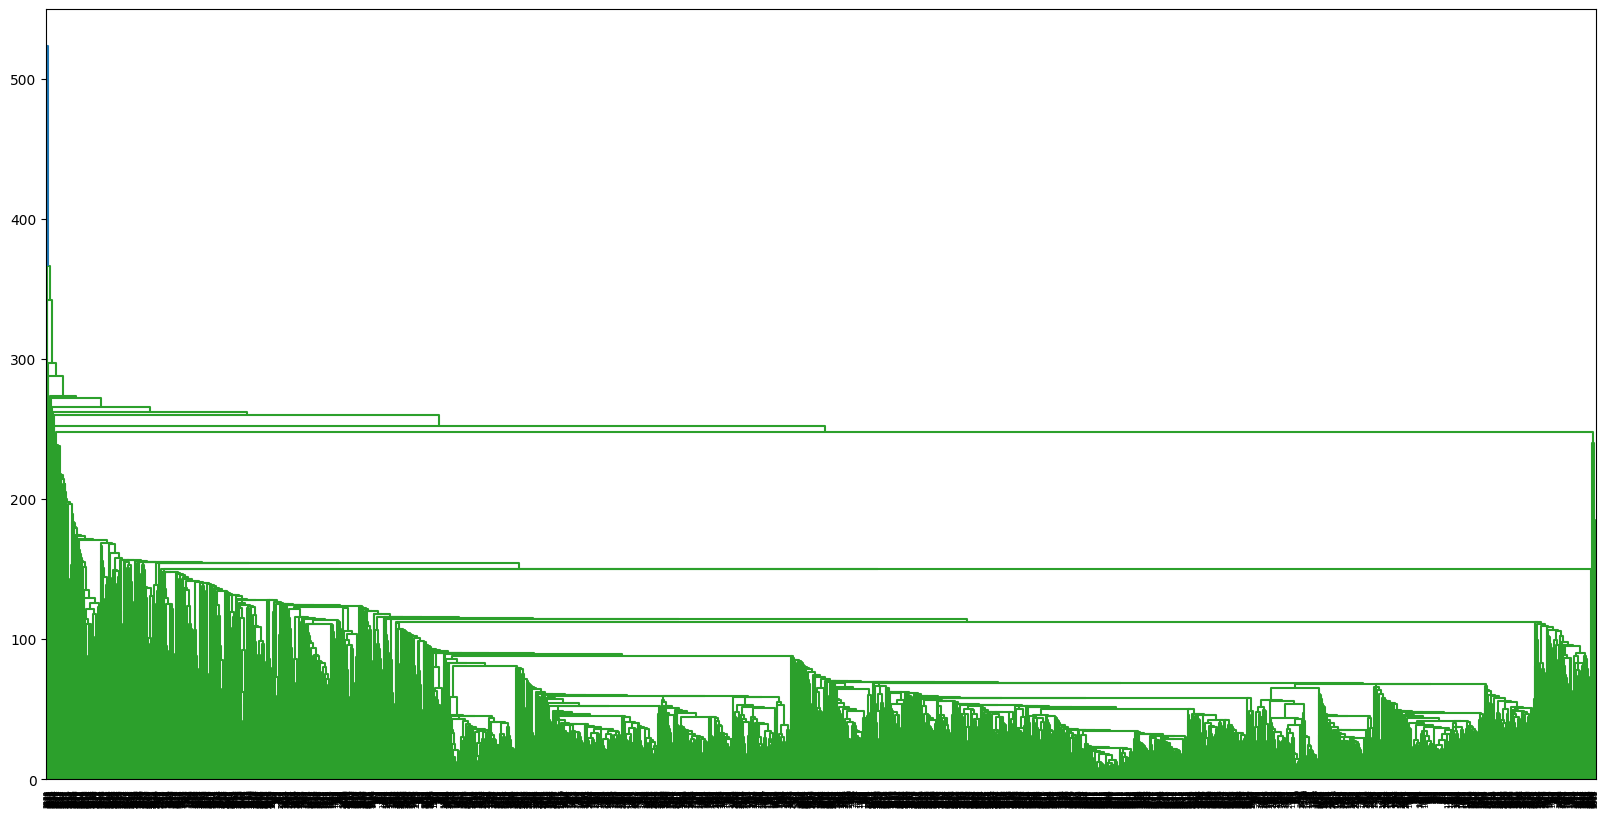

In [57]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix)

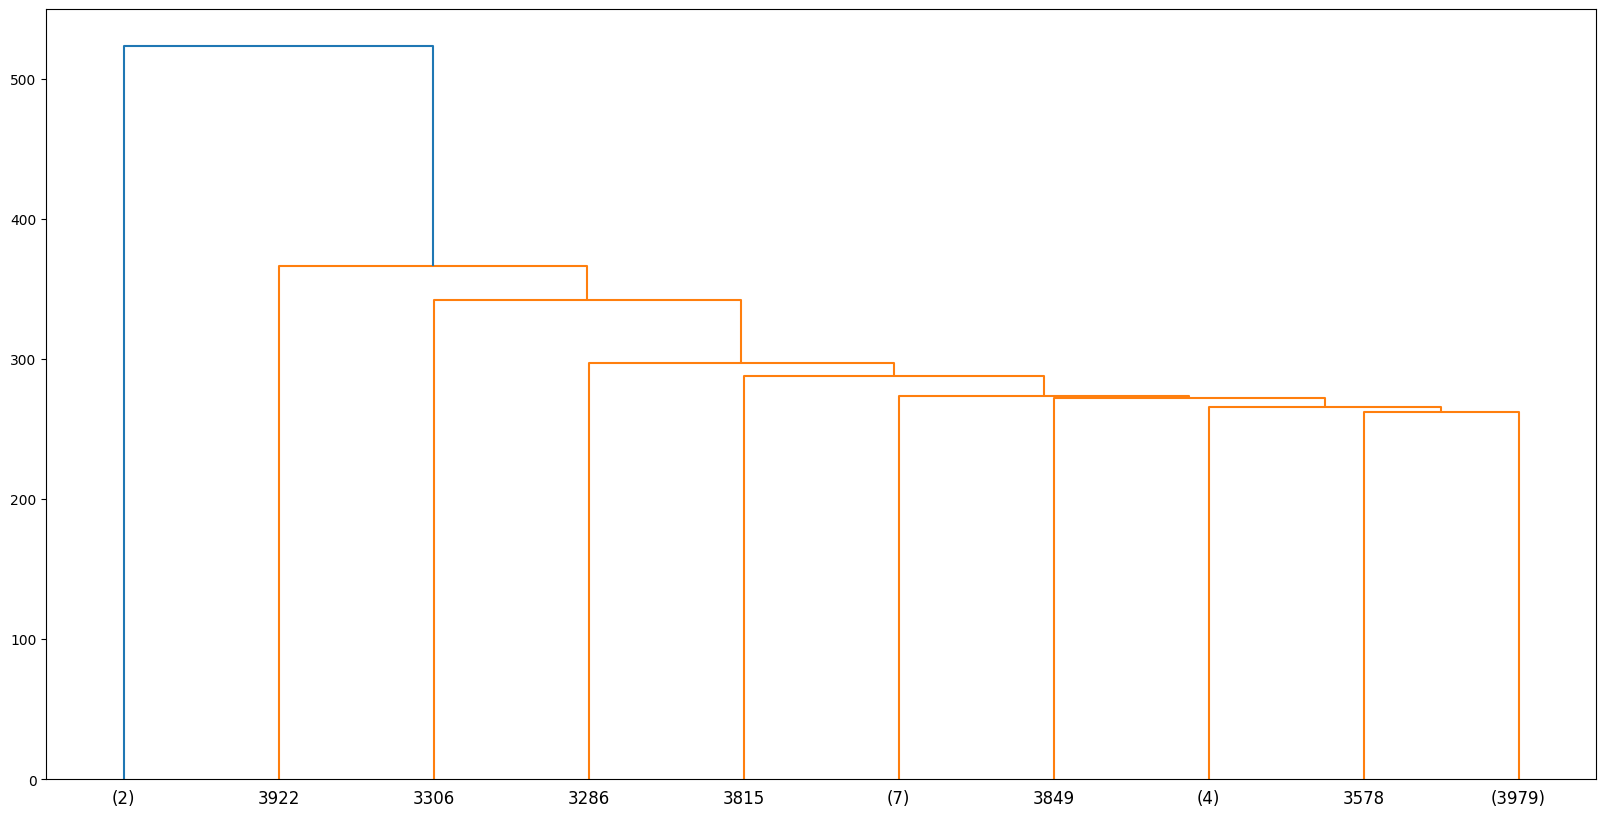

In [58]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

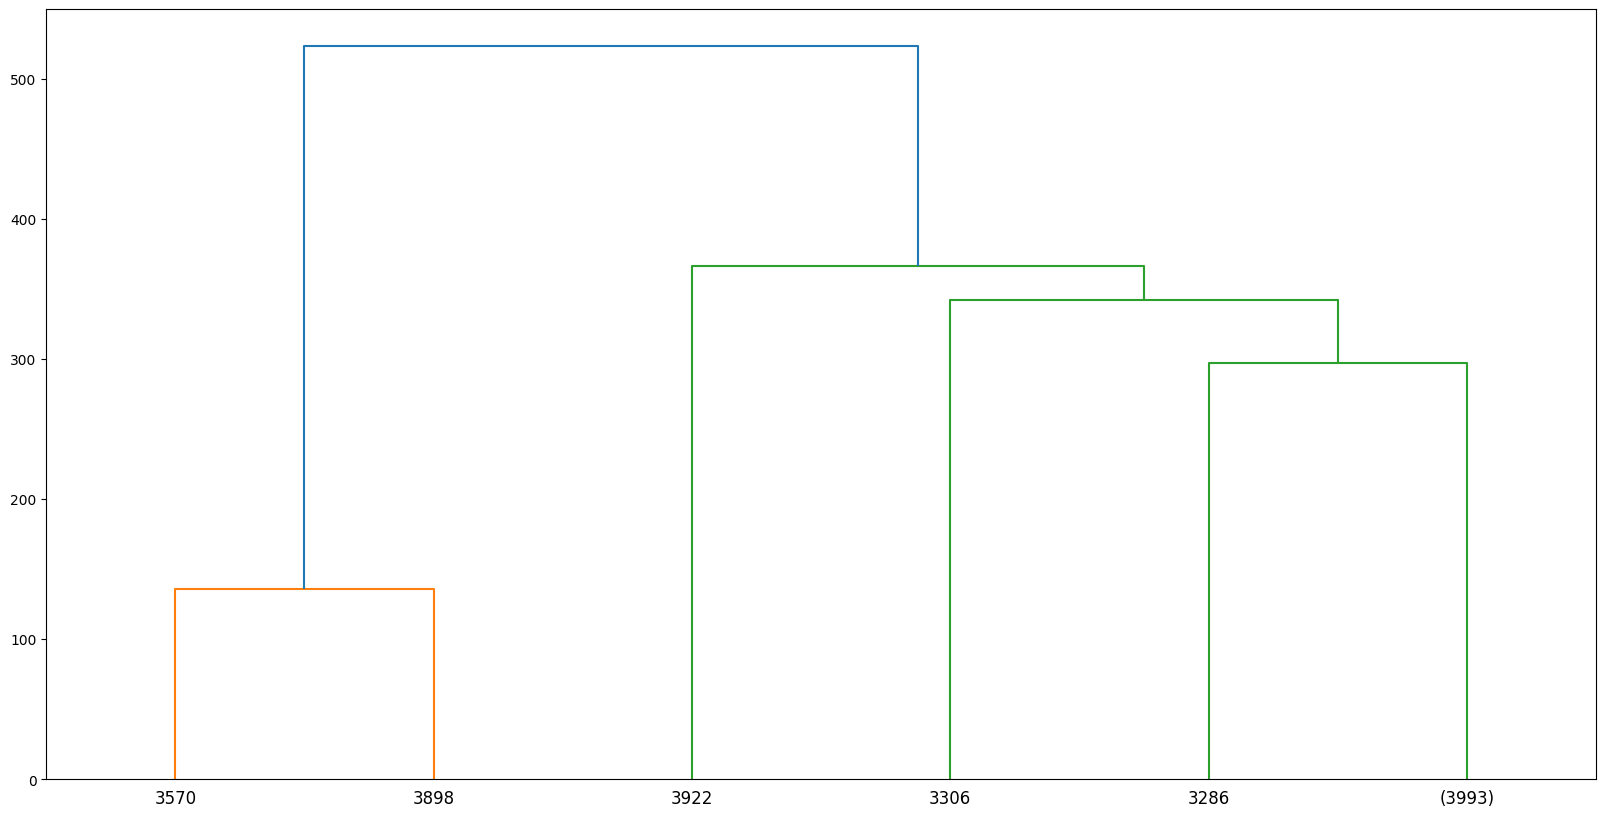

In [59]:
plt.figure(figsize=(20,10))
dendro = dendrogram(linkage_matrix,truncate_mode='level',p=3)

In [60]:
# Calculate linkage matrix
linked = linkage(scaled_data, method='ward')

In [62]:
# Initialize an array to store the SSD for different numbers of clusters
ssd = []

# Iterate through different numbers of clusters
for k in range(1, 11):  # You can adjust the range as needed
    # Perform hierarchical clustering and assign labels
    labels = fcluster(linked, k, criterion='maxclust')
    
    # Calculate the centroids of each cluster
    centroids = [data[labels == i].mean(axis=0) for i in range(1, k + 1)]
    
    # Calculate the SSD
    cluster_ssd = sum(((data[labels == i] - centroids[i - 1]) ** 2).sum() for i in range(1, k + 1))
    ssd.append(cluster_ssd)

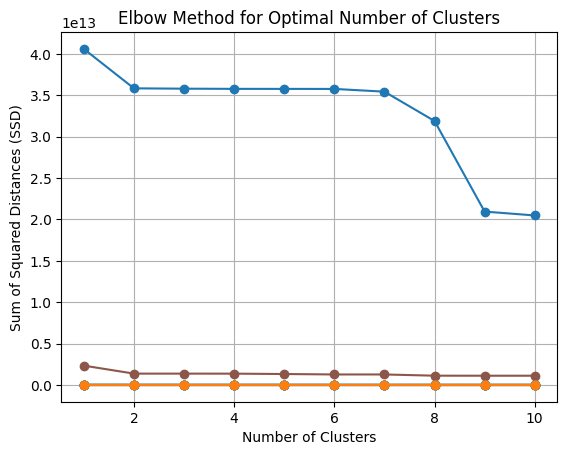

In [63]:
# Plot the SSD versus the number of clusters
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()

- The elbow method suggests that the data is best represented by two clusters.

In [64]:
hierarchical_model = AgglomerativeClustering(n_clusters=2)

In [65]:
cluster_labels = hierarchical_model.fit_predict(scaled_data)

In [66]:
cluster_labels

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [71]:
data['Hierarchical Labels'] = hierarchical_model.labels_
data['Hierarchical Labels'].value_counts()

Hierarchical Labels
1    2489
0    1510
Name: count, dtype: int64

In [73]:
data.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMenas Labels,Hierarchical Labels
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0


In [75]:
data.drop(['KMenas Labels'],axis=1).corr()['Hierarchical Labels'].sort_values()

cc1_miles             -0.762121
Bonus_miles           -0.643698
Bonus_trans           -0.603085
Award                 -0.484722
Balance               -0.342525
Flight_trans_12       -0.227925
Qual_miles            -0.223792
Flight_miles_12mo     -0.219069
Days_since_enroll     -0.214992
cc3_miles             -0.080585
cc2_miles              0.076520
Hierarchical Labels    1.000000
Name: Hierarchical Labels, dtype: float64

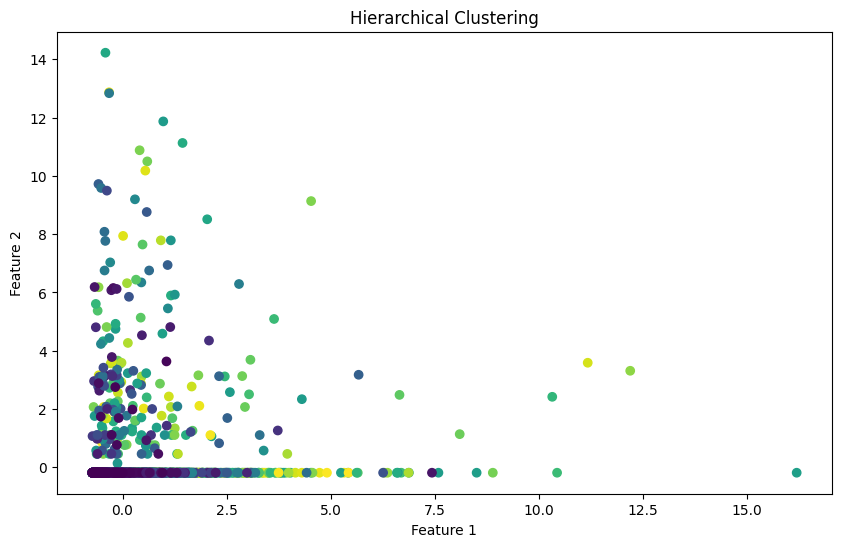

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=hierarchy_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# DBSCAN

In [76]:
from sklearn.cluster import DBSCAN

In [77]:
dbscan = DBSCAN()

In [78]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):
    
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_data.shape[1])
    dbscan.fit(scaled_data)
    
    percent_outliers = 100*np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(percent_outliers)

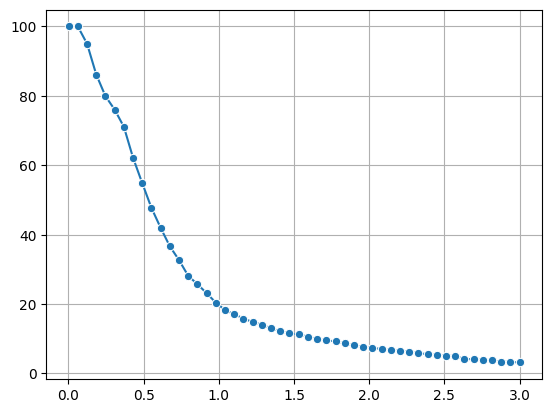

In [79]:
sns.lineplot(x=np.linspace(0.001,3,50), y=outlier_percent,marker='o')
plt.grid()

- Based on the plot created previously, retraining a DBSCAN model with a reasonable epsilon value.

In [80]:
dbscan = DBSCAN(eps=2,min_samples=scaled_data.shape[1])

In [81]:
dbscan.fit(scaled_data)

DBSCAN(eps=2, min_samples=11)

In [82]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

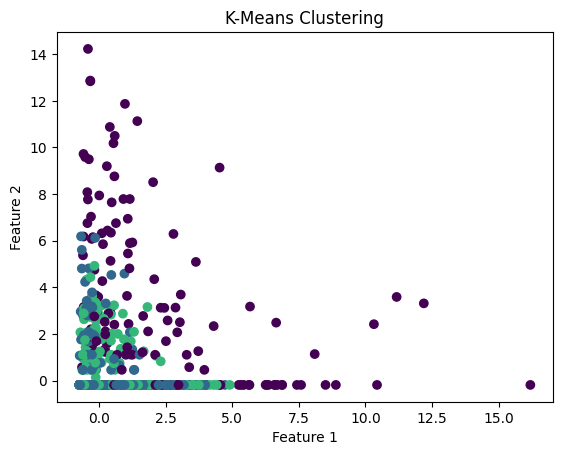

In [83]:
# Load the cluster labels
dbscan_labels = dbscan.labels_

# Create a scatter plot of the data, colored by cluster membership
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)

# Add axis labels and a title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering")

# Show the plot
plt.show()

In [87]:
data['DBSCAN Labels'] = dbscan_labels
data['DBSCAN Labels'].value_counts()

DBSCAN Labels
 0    2441
 1    1302
-1     240
 2      16
Name: count, dtype: int64

In [88]:
data.sample(10)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KMenas Labels,Hierarchical Labels,DBSCAN Labels
2834,41824,0,1,1,1,2100,3,0,0,1982,0,1,1,0
77,111157,0,4,1,1,32883,19,0,0,7771,0,0,0,0
3699,13560,0,1,1,1,0,0,0,0,368,0,1,1,0
1261,31007,0,1,1,1,5700,6,1200,4,5465,1,1,1,1
3411,105737,0,5,1,1,71728,13,0,0,1705,0,0,0,0
2310,88232,0,1,1,1,11550,5,550,3,3729,1,1,1,1
3787,62589,0,1,1,1,10000,4,0,0,2803,1,1,1,1
1568,8103,0,1,1,1,2750,15,0,0,4776,1,1,1,1
1772,134937,0,1,1,1,500,1,0,0,4427,1,1,1,1
3246,22134,0,1,1,1,0,0,0,0,2161,0,1,1,0
